<center><h1><font style="color:red;">ASSIGNMENT 8</font></h1><br></center>
<h3>

* Name : Achal Rajesh Mate
* Roll No : 2203541
* Enroll No : MITU20BTCSD001
* Branch : CSE
* Class : TY CSE Is - 3
* Guided By : Prof Nagesh Jadhav Sir

<h3><font style="color:red;">Title:- </font>
   Implement decision tree classification/regression technique for any dataset
Developed model should be able to answer the given queries.</h3>

<h3><font style="color:red;">Objectives:- </font> <br>
1. To learn about decision trees<br>
2. To implement decision trees and compare result
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

### Decision Tree Classifier 
* Decision tree algorithm falls under the category of supervised learning.
* Decision Trees are versatile Machine Learning algorithms that can per‐form both classification and regression tasks, and even multioutput tasks.
* They are very powerful algorithms, capable of fitting complex datasets.
*  It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
* It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
* A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
* Below diagram explains the general structure of a decision tree:

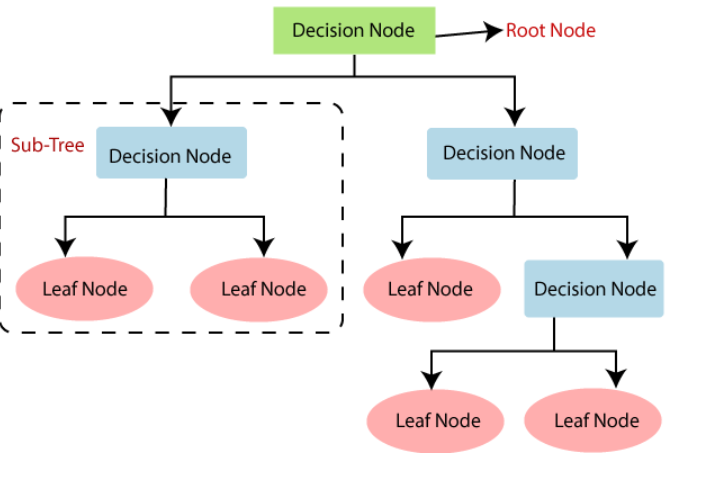

* Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
* The logic behind the decision tree can be easily understood because it shows a tree-like structure.
* On every split, the algorithm tries to divide the dataset into the smallest subset possible. 
* So, like any other Machine Learning algorithm, the goal is to minimize the loss function as much as possible.
* Decision Tree use loss functions that evaluate the split based on the purity of the resulting nodes.
* A loss function that compares the class distribution before and after the split  like Gini Impurity and Entropy.
#### Gini Impurity
Gini Impurity is measure of variance across the different classes
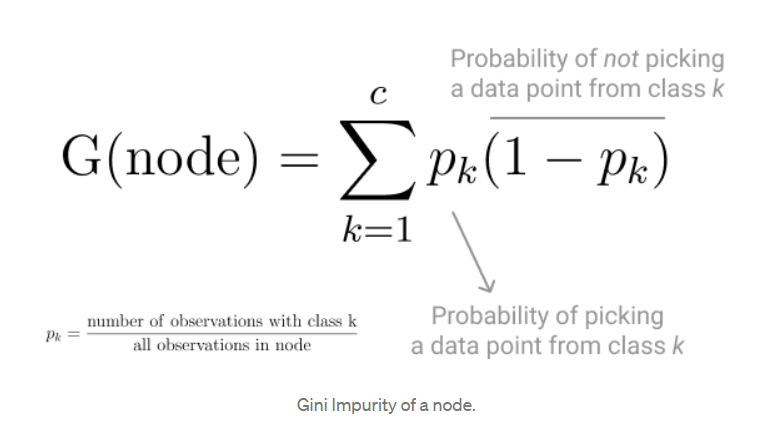
#### Entropy
Similarly to Gini Impurity, Entropy is a measure of chaos within the node. And chaos, in the context of decision trees, is having a node where all classes are equally present in the data.<br>
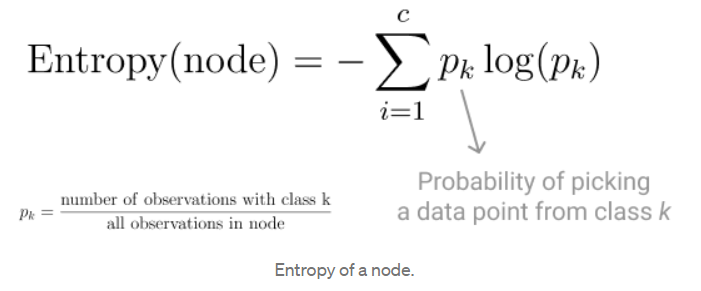<br>
Using Entropy as loss function, a split is only performed if the Entropy of each the resulting nodes is lower than the Entropy of the parent node. Otherwise, the split is not locally optimal

### DataSet Name :- Customer Churn Prediction
### Context : - 
* Predict behavior to retain customers.
* Churn is defined in business terms as ‘when a client cancels a subscription to a service they have been using.
* Churn Prediction is essentially predicting which clients are most likely to cancel a subscription i.e ‘leave a company’ based on their usage of the service.
* from a company point of view, it is necessary to gain this information because acquiring new customers is often arduous and costlier than retaining old ones. Hence, the insights gained from Churn Prediction helps them to focus more on the customers that are at a high risk of leaving.
* The output in the case of Churn prediction is a simple yes or a no. That makes it a classification problem where you have to predict 1 if the customer is likely to churn and 0 otherwise

### Dataset Link : 
https://www.kaggle.com/competitions/customer-churn-prediction-2020/data

### Feature description:
1. 'customerID': Customer ID
2. 'gender': Whether the customer is a male or a female
3. 'SeniorCitizen': Whether the customer is a senior citizen or not (1, 0)
4. 'Partner': Whether the customer has a partner or not (Yes, No)
5. 'Dependents': Whether the customer has dependents or not (Yes, No)
6. 'tenure': Number of months the customer has stayed with the company
7. 'PhoneService': Whether the customer has a phone service or not (Yes, No)
8. 'MultipleLines': Whether the customer has multiple lines or not (Yes, No, No phone service)
9. 'InternetService': Customer’s internet service provider (DSL, Fiber optic, No)
10. 'OnlineSecurity': Whether the customer has online security or not (Yes, No, No internet service)
11. 'OnlineBackup': Whether the customer has online backup or not (Yes, No, No internet service)
12. 'DeviceProtection': Whether the customer has device protection or not (Yes, No, No internet service)
13. 'TechSupport': Whether the customer has tech support or not (Yes, No, No internet service)
14. 'StreamingTV': Whether the customer has streaming TV or not (Yes, No, No internet service)
15. 'StreamingMovies': Whether the customer has streaming movies or not (Yes, No, No internet service)
16. 'Contract': The contract term of the customer (Month-to-month, One year, Two year)
17. 'PaperlessBilling': Whether the customer has paperless billing or not (Yes, No)
18. 'PaymentMethod': The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. 'MonthlyCharges': The amount charged to the customer monthly
20. 'TotalCharges': The total amount charged to the customer
21. 'Churn': Whether the customer churned or not (Yes or No)
22. 'Churn' is the target feature

### import important libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


### read the dataset

In [4]:
df = pd.read_csv("D:\Downloads\DataSet\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### View Columns of Dataset

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### View Dimensions of Dataset

In [7]:
df.shape

(7043, 21)

#### This Dataset contains 7043 instance with 21 features including independent feature

### Concise Summary

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### In the above result except SeniorCitizen,tenure,MonthlyCharges all the features are categorical and we need to convert them into numberical 

In [9]:
num_cols = [df.select_dtypes(include=['float64','int64']).columns]
num_cols

[Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')]

### Checking the unique values of each categorical column and forming data pre-processing

In [10]:
cat = [df.select_dtypes(include='object').columns]

In [11]:
cat

[Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object')]

In [12]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [17]:
df.MultipleLines.replace(to_replace=['No phone service'],value=['No'],inplace=True)

In [18]:
df.MultipleLines.unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
df.OnlineSecurity.replace(to_replace=['No internet service'],value=['No'],inplace=True)

In [22]:
df.OnlineSecurity.unique()

array(['No', 'Yes'], dtype=object)

In [23]:
df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [24]:
df.OnlineBackup.replace(to_replace=['No internet service'],value=['No'],inplace=True)

In [25]:
df.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [27]:
df.DeviceProtection.replace(to_replace=['No internet service'],value=['No'],inplace=True)

In [28]:
df.DeviceProtection.unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [30]:
df.TechSupport.replace(to_replace=['No internet service'],value=['No'],inplace=True)
df.TechSupport.unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [32]:
df.StreamingMovies.replace(to_replace=['No internet service'],value=['No'],inplace=True)
df.StreamingMovies.unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [34]:
df.StreamingTV.replace(to_replace=['No internet service'],value=['No'],inplace=True)
df.StreamingTV.unique()

array(['No', 'Yes'], dtype=object)

In [35]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [36]:
df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [37]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [38]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

#### Here TotalCharge values are in string and we need to convert those values in string

In [39]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [40]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

### Check value count of target variable

In [41]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

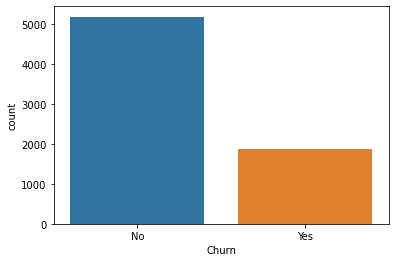

In [42]:
sns.countplot(df.Churn)

In [43]:
clm_list = ['gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn']

### Plotting the impact of categorical features on 'Churn'

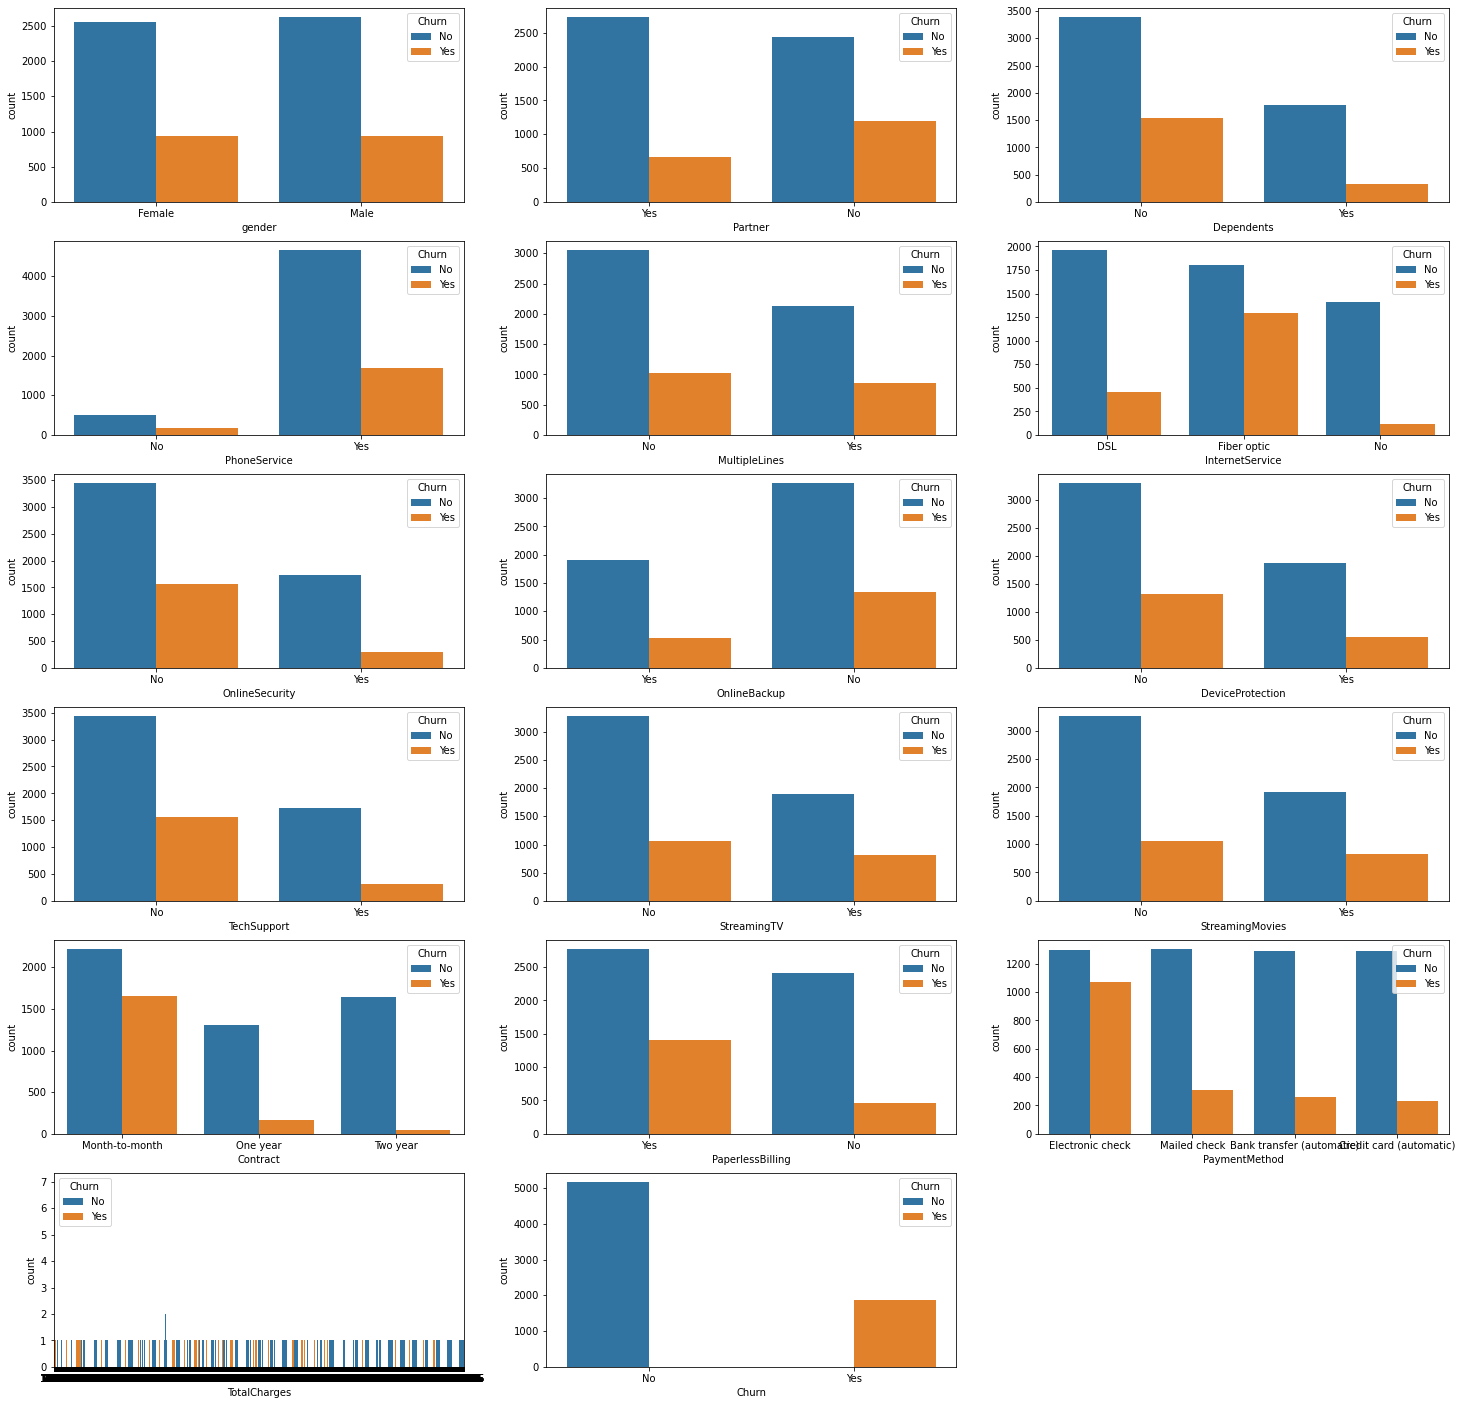

In [44]:
plt.figure(figsize=(25,25))
for i,cat in enumerate(clm_list):
    plt.subplot(6,3,i+1)
    sns.countplot(data = df, x= cat, hue = "Churn")
plt.show()

### Plotting the impact of Numberical features on 'Churn'

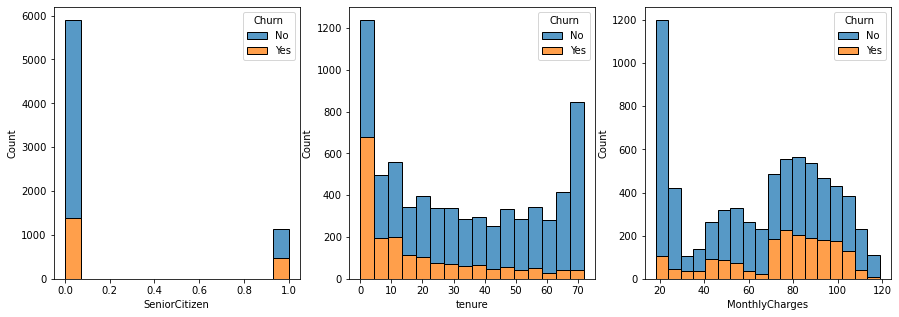

In [45]:
plt.figure(figsize=(15,5))
for j,con in enumerate(['SeniorCitizen', 'tenure', 'MonthlyCharges']):
    plt.subplot(1,3,j+1)
    sns.histplot(data = df, x= con, hue = "Churn", multiple="stack")
plt.show()

### Converting Categorical features into numberic features

In [46]:
le = LabelEncoder()
df[clm_list] = df[clm_list].apply(le.fit_transform)

### Check the +ve % to Churn datapoints

In [47]:
pos_rate = np.sum(df.Churn) / len(df.Churn) *100
print(' Churn +ve rate - ',pos_rate)


 Churn +ve rate -  26.536987079369588


#### This is an imbalanced data as the number of 'No' is far greater than the number of 'Yes' in our dataset 73% data is for 'No' and remaining 27% data is for 'Yes'

### Plot the Correlation plot

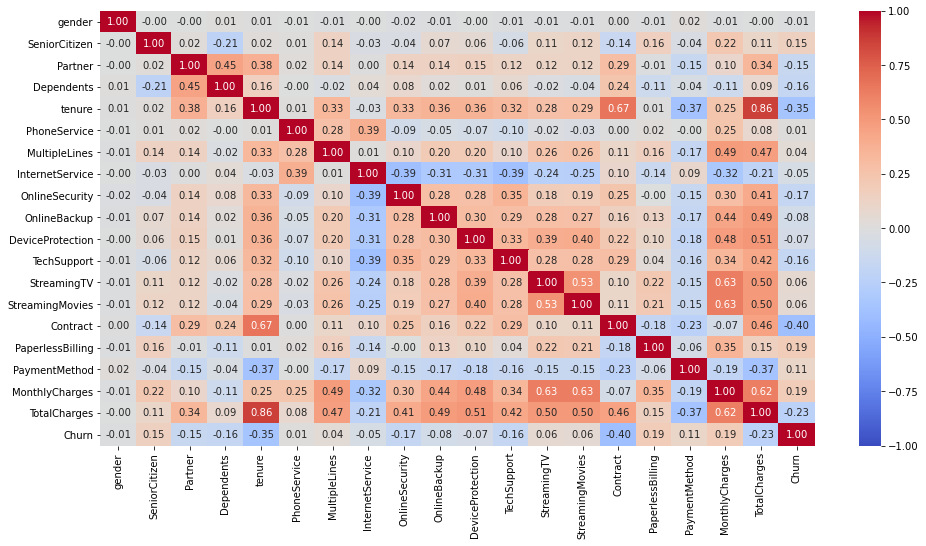

In [48]:
plt.figure(figsize=(16, 8))
sns.heatmap (df.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm');

#### Tenue and Total Charges are higly related ,Tenue and Contract are 2nd Highly related with each other

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

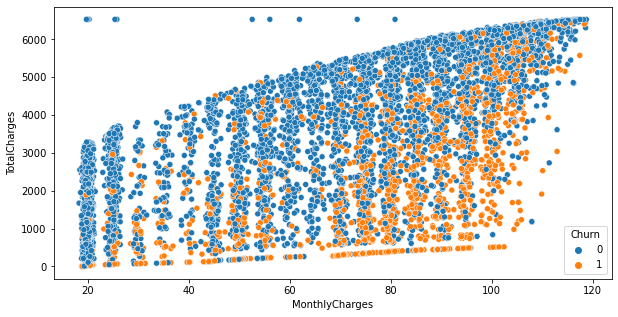

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')

#### from the above figure we can say that monthlycharges and TotalCharges are highly correlated with each other 

### Split the data

In [50]:
X  = df.drop(['customerID','Churn'],axis=1)
y = df.Churn

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=54)

In [52]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

### Feature Selection

In [53]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.0021859 , 0.01198901, 0.01089684, 0.07767593,
       0.00750736, 0.01462689, 0.05275779, 0.02134599, 0.00903989,
       0.        , 0.02563949, 0.00404074, 0.00881933, 0.10899606,
       0.01993226, 0.04660116, 0.04507905, 0.05153276])

In [54]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Contract            0.108996
tenure              0.077676
InternetService     0.052758
TotalCharges        0.051533
PaymentMethod       0.046601
MonthlyCharges      0.045079
TechSupport         0.025639
OnlineSecurity      0.021346
PaperlessBilling    0.019932
MultipleLines       0.014627
Partner             0.011989
Dependents          0.010897
OnlineBackup        0.009040
StreamingMovies     0.008819
PhoneService        0.007507
StreamingTV         0.004041
SeniorCitizen       0.002186
DeviceProtection    0.000000
gender              0.000000
dtype: float64

In [55]:
#No we Will select the  top 13 important features
sel_cols = SelectKBest(mutual_info_classif, k=13)
sel_cols.fit(X_train, y_train)
X_train=X_train.columns[sel_cols.get_support()]
X_train = pd.DataFrame(X_train)
X_train.values

array([['SeniorCitizen'],
       ['Partner'],
       ['Dependents'],
       ['tenure'],
       ['InternetService'],
       ['OnlineSecurity'],
       ['TechSupport'],
       ['StreamingMovies'],
       ['Contract'],
       ['PaperlessBilling'],
       ['PaymentMethod'],
       ['MonthlyCharges'],
       ['TotalCharges']], dtype=object)

In [56]:
X1 = df[['SeniorCitizen',
       'Dependents',
       'tenure',
       'InternetService',
       'OnlineSecurity','OnlineBackup',
       'TechSupport',
       'StreamingMovies',
       'Contract',
       'PaperlessBilling',
       'PaymentMethod',
       'MonthlyCharges',
       'TotalCharges']]
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)

In [57]:
DT1 = DecisionTreeClassifier().fit(X_train,y_train)

In [58]:
y_pred_train = DT1.predict(X_train)
y_pred_test = DT1.predict(X_test)
print("Training Accuracy is ",accuracy_score(y_pred_train,y_train))
print("Testing Accuracy is ",accuracy_score(y_pred_test,y_test))

Training Accuracy is  0.9966276180333689
Testing Accuracy is  0.7381121362668559


### Model is Overfitting now perform parameter tunning 

In [59]:
DTT = DecisionTreeClassifier()
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10],
              'splitter':['best',"random"],
            'random_state':[10,51,42]
             }

# Run the grid search
grid_obj = GridSearchCV(DTT, parameters,cv=10,scoring= 'accuracy', n_jobs= -1, verbose=3)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
DTT = grid_obj.best_estimator_ 



Fitting 10 folds for each of 2304 candidates, totalling 23040 fits


In [60]:
DTT

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=10,
                       min_samples_split=50, random_state=10,
                       splitter='random')

#### Train the model using the training sets 

In [61]:
DTT.fit(X_train,y_train)
y_pred_DTT_test = DTT.predict(X_test)
y_pred_DTT_train = DTT.predict(X_train)

In [62]:
acc_DTT_test = metrics.accuracy_score(y_test, y_pred_DTT_test)
acc_DTT_train = metrics.accuracy_score(y_train, y_pred_DTT_train) 

print( 'Accuracy of DecisionTreeClassifier model training : ', acc_DTT_train )
print( 'Accuracy of DecisionTreeClassifier model testing : ', acc_DTT_test )

Accuracy of DecisionTreeClassifier model training :  0.7990770323038694
Accuracy of DecisionTreeClassifier model testing :  0.7757274662881476


### Predicting on Training Dataset

In [63]:
precision_train=metrics.precision_score(y_train,y_pred_DTT_train)
recall_train=metrics.recall_score(y_train,y_pred_DTT_train)
f1_score_train=metrics.f1_score(y_train,y_pred_DTT_train)
roc_auc_train=metrics.roc_auc_score(y_train,y_pred_DTT_train)

In [64]:
print("Precision score is =",precision_train)
print("Recall score = ",recall_train)
print("f1 SCore score is = ",f1_score_train)
print("Roc_Auc score is= ",roc_auc_train)

Precision score is = 0.6694677871148459
Recall score =  0.47959866220735786
f1 SCore score is =  0.558846453624318
Roc_Auc score is=  0.6970353784581124


### Predicting on Testing Dataset

In [65]:
precision_test=metrics.precision_score(y_test,y_pred_DTT_test)
recall_test=metrics.recall_score(y_test,y_pred_DTT_test)
f1_score_test=metrics.f1_score(y_test,y_pred_DTT_test)
roc_auc_test=metrics.roc_auc_score(y_test,y_pred_DTT_test)

In [66]:
print("Precision score is ",precision_test)
print("Recall _score is",recall_test)
print("f1 SCore score is ",f1_score_test)
print("Roc_Auc score is",roc_auc_test)

Precision score is  0.5986394557823129
Recall _score is 0.47058823529411764
f1 SCore score is  0.5269461077844312
Roc_Auc score is 0.6782892867291845


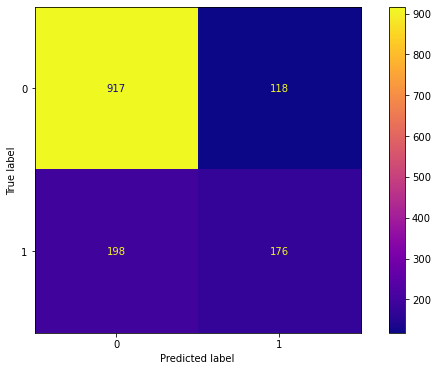

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_confusion_matrix(DTT, X_test, y_test, cmap=plt.cm.plasma, ax=ax);

### Conclusion:
#### Thus I have Successfully Studied and implemented Decision tree Algorithm on Customer Churn Data